# RQ1: Find at least three existing solutions for the problem of feeding long texts to Twitter and describe what they do.

I found three websites that offer 3 different solutions for posting long tweets:

**1.Twitlonger:** 

It uses up the allotment of characters in one Tweet, then provides a link that readers can click in order to be taken to a Web page with the entire text of your long Tweet. The tweet would look like this:

*This post was made on TwitLonger. Lots of people ask how it works, so the easiest way is to show you how… (cont) http://tl.gd/n_1s1vre6*

**2.Tinypaste:**

Using the Tinypaste website you can type the long text an a text box and the website generates a link that you can paste on the tweet so people can click on it and see the tweet.

**3.Tall Tweets:**

Tall Tweets breaks up the long Tweet into multiple Tweets, marking the end of the first Tweet as "(1/2)" and the second Tweet as "(2/2)", for instance.

The first two options offer links to access to the long text. Twitter shortens links in their own interface, but even if the link changes, the short link twitter generated still works. 

# RQ2: Name at least three benefits of functional programming in comparison to imperative programming. Are there any disadvantages as well?

Three benefits of functional programming:
    
  ***-Modularity*** : Functional programming forces you to break apart your problem into small pieces. Programs are more modular as a result. It’s easier to specify and write a small function that does one thing than a large function that performs a complicated transformation.

   ***-Composability*** : This is because each function is designed to accomplish a specific task given its arguments. The function does not rely on any external state.A function can be applied to many different situations.
    
   ***-Easier debugging and testing*** : Debugging is simplified because functions are generally small and clearly specified. 
    
Disadvantage: Most programmers are used to imperative programming, and changing to functinal programming imposes odd restrinctions in the way an algorithm can be built.

# RQ3: Find at least two different ways of blending two images of equal size.


***1) Alpha Blending using OpenCV:***

Alpha blending is the process of overlaying a foreground image with transparency over a background image.  This transparency mask is often called the alpha mask or the alpha matte. At every pixel of the image, we need to combine the foreground image color (F) and the background image color (B) using the alpha mask (\alpha).

The value of \alpha used in the equation is actually the pixel value in the alpha mask divided by 255. So, in the equation below, 0 < alpha < 1

I = alpha*F + (1 - alpha)*B

From the equation above, we can make the following observations.

When alpha = 0, the output pixel color is the background.
When alpha = 1, the output pixel color is simply the foreground.
When 0 < alpha < 1 the output pixel color is a mix of the background and the foreground. For realistic blending, the boundary of the alpha mask usually has pixels that are between 0 and 1.

***2) Screen:***

Screen mode inverts the values of each of the visible pixels in the two layers of the image. (That is, it subtracts each of them from 255.) Then it multiplies them together, divides by 255 and inverts this value again. The resulting image is usually brighter, and sometimes “washed out” in appearance. The exceptions to this are a black layer, which does not change the other layer, and a white layer, which results in a white image. Darker colors in the image appear to be more transparent.

The equation is:

E = 255 - (255-M)x(255-I)/255

Where E is the resulting image, M is the upper layer mask and I it's the image.

# RQ4: Suppose you have a sequential program for blending two images (both 640x480 pixels) together. What speedup would you expect when the program is parallelized over four processors?

Amdahl's law is often used in parallel computing to predict the theoretical speedup when using multiple processors. 

In computer architecture, Amdahl's law is a formula which gives the theoretical speedup in latency of the execution of a task at fixed workload that can be expected of a system whose resources are improved.

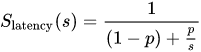


where

Slatency is the theoretical speedup of the execution of the whole task;
s is the speedup of the part of the task that benefits from improved system resources;
p is the proportion of execution time that the part benefiting from improved resources originally occupied.

100 per cent of the program is parallelized over four processors. that means p=1. The improvement makes the program four times as fast (s=4). Amdahl's law states that the overall speedup of applying the improvement will be 4

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import multiprocessing
import os, sys, errno
import re
import argparse
import time

# LA1: Functional programming

**Use functional programming (e.g. in Python) to write a program that cuts long strings into
“tweetable” chunks. Make sure that the chunks are not completely independent but
remain connected somehow, so that people can still read the complete text (for example
like the solutions you found in Research Question 1).**


I have devided the problem in little steps

I am choosing the Tall Tweets approach

In [138]:
YOUR_STRING = 'The designers of some computer languages choose to emphasize one particular approach to programming. This often makes it difficult to write programs that use a different approach. Other languages are multi-paradigm languages that support several different approaches. Lisp, C++, and Python are multi-paradigm; you can write programs or libraries that are largely procedural, object-oriented, or functional in all of these languages. In a large program, different sections might be written using different approaches; the GUI might be object-oriented while the processing logic is procedural or functional, for example. In a functional program, input flows through a set of functions. Each function operates on its input and produces some output. Functional style discourages functions with side effects that modify internal state or make other changes that aren’t visible in the function’s return value. Functions that have no side effects at all are called purely functional. Avoiding side effects means not using data structures that get updated as a program runs; every function’s output must only depend on its input. Some languages are very strict about purity and don’t even have assignment statements such as a=3 or c = a + b, but it’s difficult to avoid all side effects. Printing to the screen or writing to a disk file are side effects, for example. For example, in Python a print statement or a time.sleep(1) both return no useful value; they’re only called for their side effects of sending some text to the screen or pausing execution for a second. Python programs written in functional style usually won’t go to the extreme of avoiding all I/O or all assignments; instead, they’ll provide a functional-appearing interface but will use non-functional features internally. For example, the implementation of a function will still use assignments to local variables, but won’t modify global variables or have other side effects. Functional programming can be considered the opposite of object-oriented programming. Objects are little capsules containing some internal state along with a collection of method calls that let you modify this state, and programs consist of making the right set of state changes. Functional programming wants to avoid state changes as much as possible and works with data flowing between functions. In Python you might combine the two approaches by writing functions that take and return instances representing objects in your application (e-mail messages, transactions, etc.).'
CHAR_LIMIT = 280 # character limit in tweeter in 2020

 This function finds out the total number of characteres and the breakpoints(spaces) position in the array. Input: string. Output: total of characters of the string and position of the space characters

In [141]:
def find(s):
    total=len(s)
    return total, [i for i, ltr in enumerate(s) if ltr == " "]

total = find(YOUR_STRING)[0] #total of characters of the string
breakpoints = find(YOUR_STRING)[1] #position of the space characters

Find what's the index of the word till where we can safely split the sentence. Input: position of the space characters, character limit and total of characters of the string. Output: number of words of each chunk

In [116]:
def element_index_partition(breakpoints, CHAR_LIMIT, total):
    cnt=1
    n_words=list()
    while (CHAR_LIMIT*cnt<=total):
        n_words.append([ n for n,i in enumerate(breakpoints) if i>CHAR_LIMIT*cnt ][0])
        cnt+=1
    return n_words

n_words=element_index_partition(breakpoints, CHAR_LIMIT, total)

This function builds the chunks based on what's obtained from the previous functions. Input: number of words of each chunk. Output: chunks

In [126]:
def build_chunks(n_words, s):
    chunks=list()
    chunks.append(" ".join(YOUR_STRING.split(" ")[:n_words[0]]))
    for i in range(1,len(n_words)):
        chunks.append(" ".join(YOUR_STRING.split(" ")[n_words[i-1]:n_words[i]]))

    chunks.append((" ".join(YOUR_STRING.split(" ")[n_words[len(n_words)-1]:])))
    chunks = np.array(chunks)
    return chunks
chunks=build_chunks(n_words,YOUR_STRING)

Print the chunks. Input: chunks. Output: printed chunks

In [134]:
def print_tweets(chunks):
    for i in enumerate(chunks):
             print(i)
             print('')

In [142]:
print_tweets(chunks)

(0, 'The designers of some computer languages choose to emphasize one particular approach to programming. This often makes it difficult to write programs that use a different approach. Other languages are multi-paradigm languages that support several different approaches. Lisp, C++,')

(1, 'and Python are multi-paradigm; you can write programs or libraries that are largely procedural, object-oriented, or functional in all of these languages. In a large program, different sections might be written using different approaches; the GUI might be object-oriented while the')

(2, 'processing logic is procedural or functional, for example. In a functional program, input flows through a set of functions. Each function operates on its input and produces some output. Functional style discourages functions with side effects that modify internal state or make')

(3, 'other changes that aren’t visible in the function’s return value. Functions that have no side effects at all are called purely functi

# LA2: Parallel programming

**Using the tutorial by Software Carpentry as an example (see Preliminary readings), write a parallel processing program to blend together two images of the same size. Choose your own way of blending and use your own example images for testing. Measure and display graphically the execution times when you use different numbers of processors and compare this with your answer to Research Question 4.**

In [2]:
#Function to blend two images together. I chose alpha blending with OpenCV
pic1 = cv2.imread('lena.jpg')
pic2 = cv2.imread('rocket.jpg')
pic2 = cv2.resize(pic2, pic1.shape[1::-1])

def blend(img1,img2,alpha):
    img = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
    return (img)
    


Count the number of processors I can use

In [3]:
multiprocessing.cpu_count()

8

In [7]:
for i in range(1,multiprocessing.cpu_count()+1):
    start=time.time()
    pool = multiprocessing.Pool(i)
    result = [pool.apply_async(blend(pic1,pic2,0.3))]
    finish=time.time()
    print('time used with ' + format(i) + ' processors', (finish-start)*1000,' ms')
    pool.close()
    pool.join()

time used with 1 processors 18.002033233642578  ms
time used with 2 processors 5.582332611083984  ms
time used with 3 processors 6.891489028930664  ms
time used with 4 processors 7.758140563964844  ms
time used with 5 processors 14.927864074707031  ms
time used with 6 processors 13.961553573608398  ms
time used with 7 processors 26.030302047729492  ms
time used with 8 processors 37.787675857543945  ms


This is not what I expected. Apparently using 2 processors is faster than 1, but more than two just makes the process slower. Ater doing some research about this issue I found an interesting answer: https://www.quora.com/How-does-multithreading-improve-performance

*Multi threading improves performance by allowing multiple CPUs to work on a problem at the same time; but it only helps if two things are true: as long as the CPU speed is the limiting factor (as opposed to memory, disk, or network bandwidth) and so long as multithreading doesn’t introduce so much additional work (aka “overhead”) that the benefit is lost.*

*Too much multithreading is just as much a problem as too little. Consider the task of assembling a house: it’s a big job, and having more than one worker is helpful. But there are limits. Ten workers is great! A hundred is challenging. Ten thousand probably means the house will get built more slowly than with just twenty (do you have enough tools? Enough bathrooms? Is there even enough work to do?). And there are also jobs that cannot be split; such as the old joke of hiring 9 women in order to gestate a baby in only one month instead of nine.*